<a href="https://colab.research.google.com/github/goyal-divyansh-25/Lung_cancer_prediction/blob/main/Lung_Cancer_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Collection and processing

In [2]:
lung= pd.read_csv('/content/lung.csv')

In [3]:
lung.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
lung.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [6]:
lung.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
lung.shape

(309, 16)

In [8]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [9]:
lung.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
lung['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [11]:
lung["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [12]:
lung["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [13]:
print ('Total Healthy Patients : {} '.format(lung.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(lung.LUNG_CANCER.value_counts()[1]))

Total Healthy Patients : 270 
Total Suspected Patients : 39 


<Axes: >

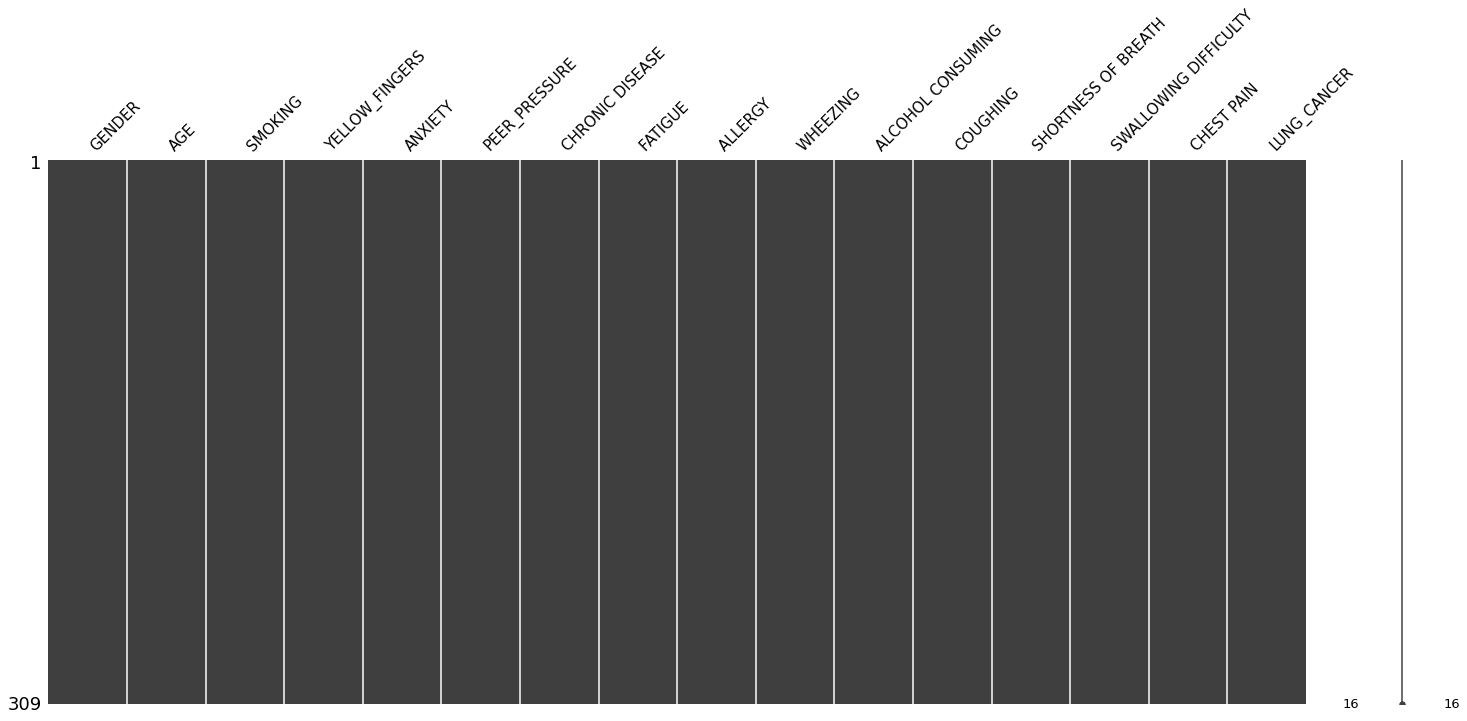

In [14]:
msno.matrix(lung, fontsize=15)

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

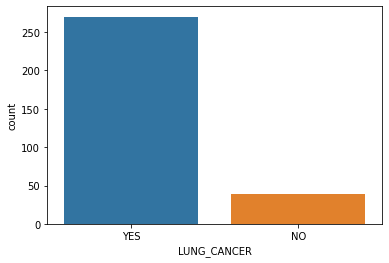

In [15]:
 sns.countplot(x = "LUNG_CANCER",data= lung)


array([<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'YES'}>],
      dtype=object)

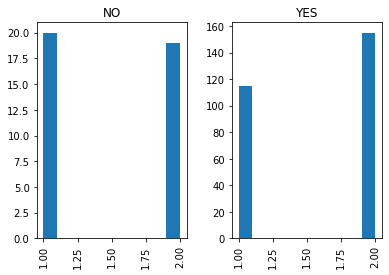

In [16]:
lung.hist(column='SMOKING', by='LUNG_CANCER')

array([<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'YES'}>],
      dtype=object)

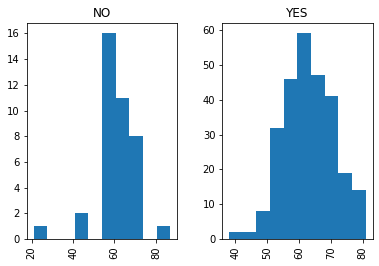

In [17]:
lung.hist(column='AGE', by='LUNG_CANCER')

In [18]:

fig = px.scatter (lung, x = "AGE", y = "SMOKING", color = "LUNG_CANCER", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [19]:
fig = px.histogram (lung, x = "ALCOHOL CONSUMING",  facet_row = "LUNG_CANCER",  template = 'plotly_dark')
fig.show ()

In [20]:
fig = px.histogram (lung, x = "AGE",  facet_row = "LUNG_CANCER",  template = 'plotly_dark')
fig.show ()

<Axes: >

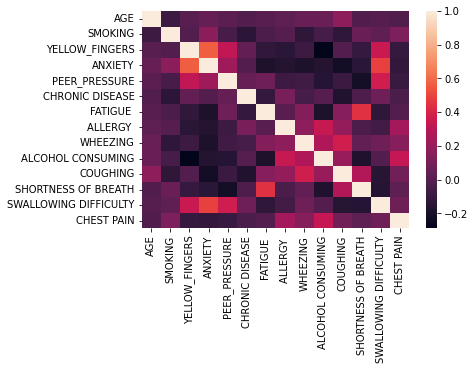

In [21]:
sns.heatmap(lung.corr())

<Axes: xlabel='SMOKING', ylabel='count'>

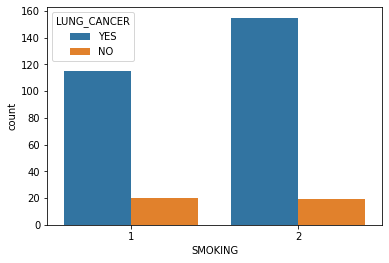

In [22]:
sns.countplot(x= 'SMOKING',data=lung,hue='LUNG_CANCER')

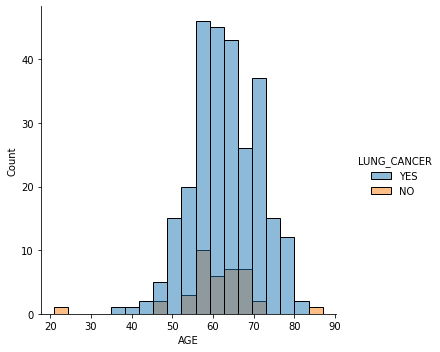

In [23]:
sns.displot(x="AGE",data=lung, hue="LUNG_CANCER")

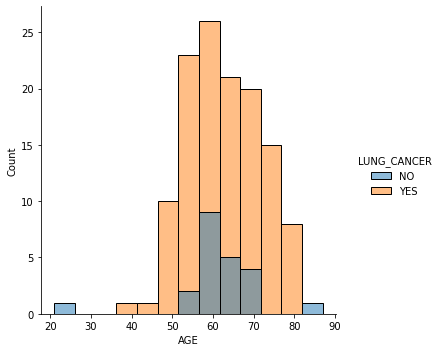

In [24]:
sns.displot(x='AGE',data=lung[lung['GENDER']=='F'],hue='LUNG_CANCER')

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

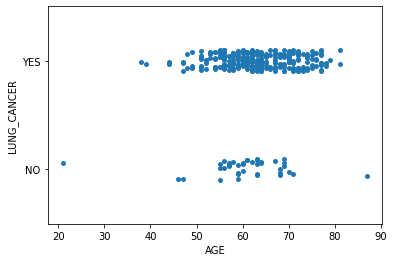

In [25]:
sns.stripplot(x='AGE', y='LUNG_CANCER', data=lung)

<Axes: xlabel='GENDER', ylabel='ANXIETY'>

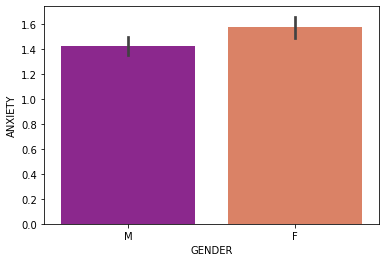

In [26]:
# standard deviation 
sns.barplot(x ='GENDER', y ='ANXIETY', data = lung,palette ='plasma')

<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

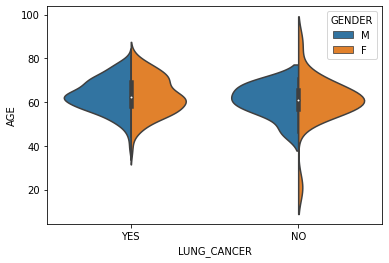

In [27]:
sns.violinplot(x='LUNG_CANCER', y='AGE', data=lung,
               hue='GENDER', split=True)

### Mapping values

In [43]:

lung.replace({'GENDER':{'M':0,'F':1}}, inplace=True)
lung.replace({'LUNG_CANCER':{'YES':0,'NO':1}}, inplace=True)


In [44]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
#splitting features and target
X = lung.drop('LUNG_CANCER',axis=1)    #axis=1 when dropping column       
y = lung['LUNG_CANCER']   
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [47]:
print(y)

0      0
1      0
2      1
3      1
4      1
      ..
304    0
305    0
306    0
307    0
308    0
Name: LUNG_CANCER, Length: 309, dtype: int64


### Splitting data into training and testing

In [48]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3,random_state=42)
print(X.shape , X_train.shape , X_test.shape)

(309, 15) (216, 15) (93, 15)


In [49]:
len(X_train), len(X_test)

(216, 93)

In [50]:
print(y_train)

298    0
287    0
72     0
15     0
10     0
      ..
188    0
71     0
106    0
270    1
102    0
Name: LUNG_CANCER, Length: 216, dtype: int64


### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
#accuracy on training 
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)
print('Accuracy on Training Data:', training_data_accuracy_knn)

Accuracy on Training Data: 0.8888888888888888


In [53]:
#accuracy on testing 
X_test_prediction_knn = knn.predict(X_test)
testing_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_knn)

Accuracy on Testing Data: 0.9354838709677419


### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [55]:
#accuracy on testing 
X_test_prediction_rf = rf.predict(X_test)
testing_data_accuracy_rf = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_rf)

Accuracy on Testing Data: 0.967741935483871


In [56]:
#accuracy on training 
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
print('Accuracy on Training Data:', training_data_accuracy_rf)

Accuracy on Training Data: 0.9953703703703703


### Building predictive system

In [69]:
input_data=(0,69,1,2,2,1,1,2,1,2,2,2,2,2,2)
#change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping numpy array for predicting only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print ("Patient has lung cancer")
else:
    print('Patient has no lung cancer')

[0]
Patient has lung cancer


### LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
#accuracy on training 
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.9166666666666666


In [59]:
#accuracy on testing
X_test_prediction = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy)

Accuracy on Testing Data: 0.978494623655914


### DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
#accuracy on training 
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)
print('Accuracy on Training Data:', training_data_accuracy_dt)

Accuracy on Training Data: 0.9953703703703703


In [62]:
#accuracy on testing 
X_test_prediction_dt = dt.predict(X_test)
testing_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_dt)

Accuracy on Testing Data: 0.9139784946236559


### Support Vector Machine

In [63]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [64]:
X_test_prediction_sv = sv.predict(X_test)
testing_data_accuracy_sv = accuracy_score(X_test_prediction_sv, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_sv)

Accuracy on Testing Data: 0.9247311827956989


In [66]:
#accuracy on training 
X_train_prediction_sv = knn.predict(X_train)
training_data_accuracy_sv = accuracy_score(X_train_prediction_sv, y_train)
print('Accuracy on Training Data:', training_data_accuracy_sv)

Accuracy on Training Data: 0.8888888888888888


### Comparing accuracy of above algorithms

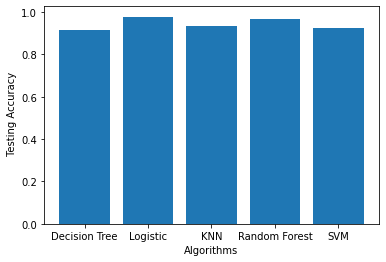

In [67]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[testing_data_accuracy_dt,testing_data_accuracy,testing_data_accuracy_knn,testing_data_accuracy_rf,testing_data_accuracy_sv])
plt.xlabel("Algorithms")
plt.ylabel(" Testing Accuracy")
plt.show()
     

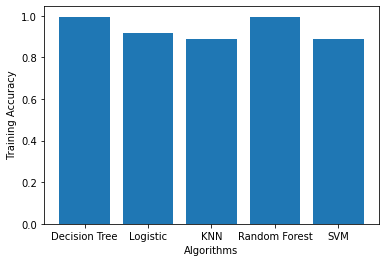

In [68]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[training_data_accuracy_dt,training_data_accuracy,training_data_accuracy_knn,training_data_accuracy_rf,training_data_accuracy_sv])
plt.xlabel("Algorithms")
plt.ylabel(" Training Accuracy")
plt.show()